In [ ]:
from google.colab import drive # To mount google drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing libraries
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from keras.models import load_model
import cv2
import numpy as np
import keras
import h5py


checkpoint_dir = '/content/drive/My Drive/Face_Mask/model_weights_new/' # directory of model or checkpoint
print(os.listdir(checkpoint_dir))

['checkpoint', '.index', '.data-00001-of-00002', '.data-00000-of-00002']


In [ ]:
model =tf.keras.models.load_model('/content/drive/My Drive/Face_Mask/model_complete/my_model.h5') #loading the model

#Code to test Pre trained model on image data

(428, 320, 3)


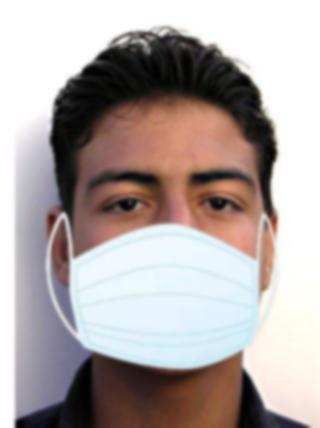

(1, 150, 150, 3)
 with mask
(225, 225, 3)


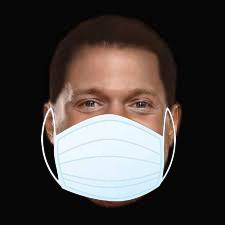

(1, 150, 150, 3)
 with mask
(428, 320, 3)


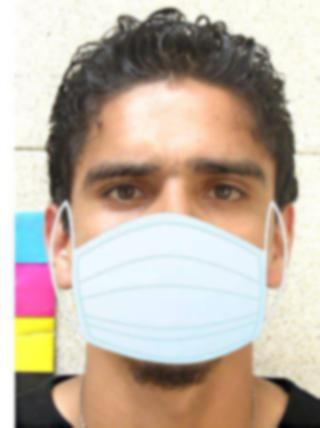

(1, 150, 150, 3)
 with mask
(428, 320, 3)


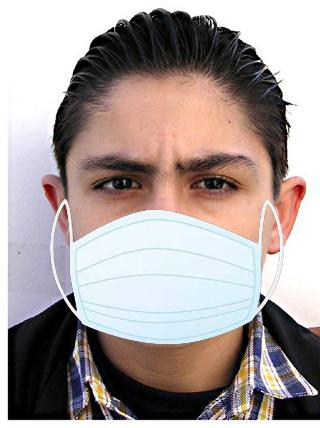

(1, 150, 150, 3)
 with mask
(433, 327, 3)


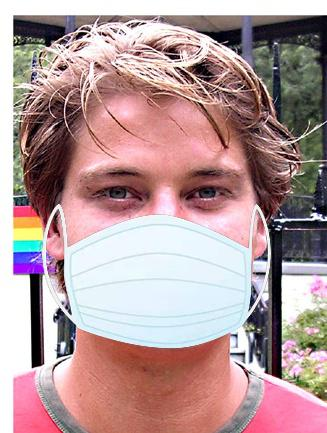

(1, 150, 150, 3)
 with mask
(428, 320, 3)


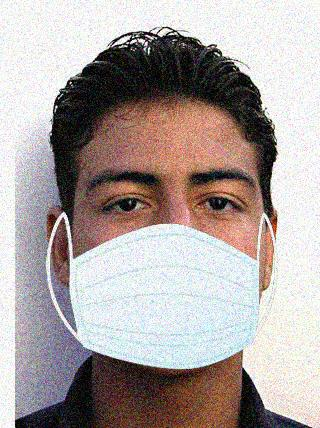

(1, 150, 150, 3)
 with mask
(428, 320, 3)


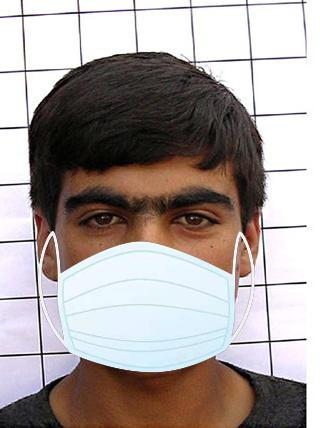

(1, 150, 150, 3)
without mask
(428, 320, 3)


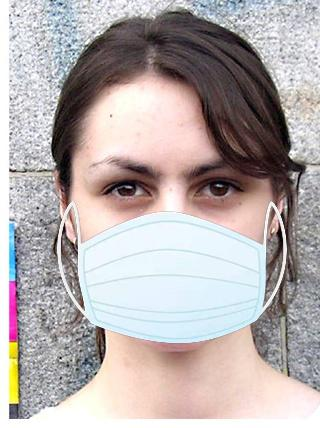

(1, 150, 150, 3)
 with mask
(442, 318, 3)


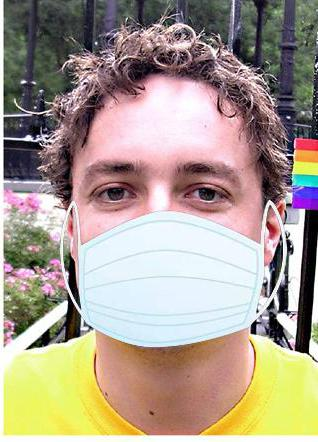

(1, 150, 150, 3)
 with mask
(428, 320, 3)


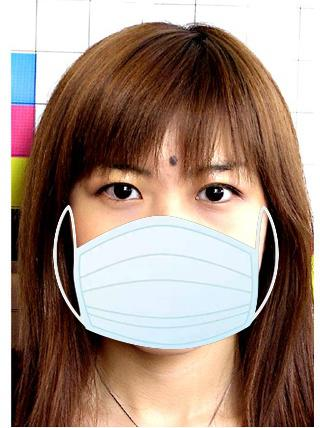

(1, 150, 150, 3)
 with mask
(428, 320, 3)


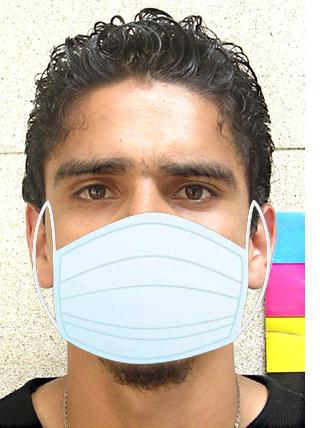

(1, 150, 150, 3)
 with mask
(366, 351, 3)


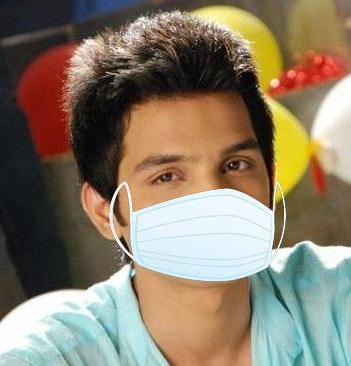

(1, 150, 150, 3)
 with mask
(433, 320, 3)


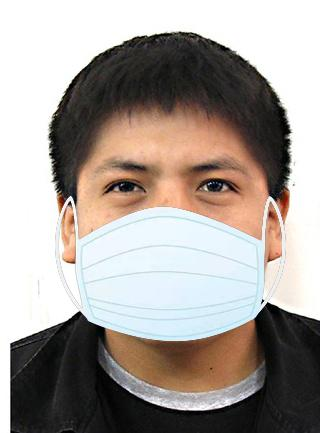

(1, 150, 150, 3)
without mask
(181, 278, 3)


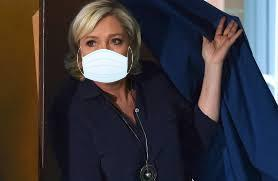

(1, 150, 150, 3)
without mask
(194, 259, 3)


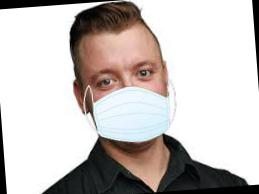

(1, 150, 150, 3)
without mask
(428, 320, 3)


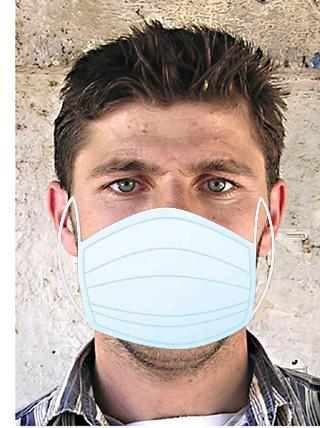

(1, 150, 150, 3)
 with mask
(433, 320, 3)


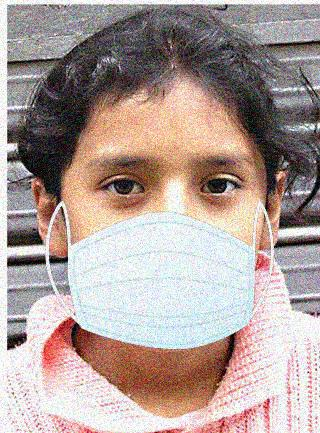

(1, 150, 150, 3)
 with mask
(246, 205, 3)


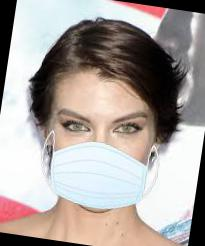

(1, 150, 150, 3)
without mask
(428, 320, 3)


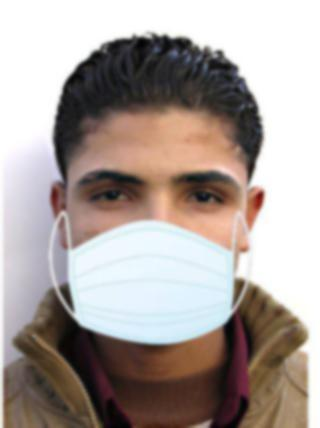

(1, 150, 150, 3)
 with mask
(597, 545, 3)


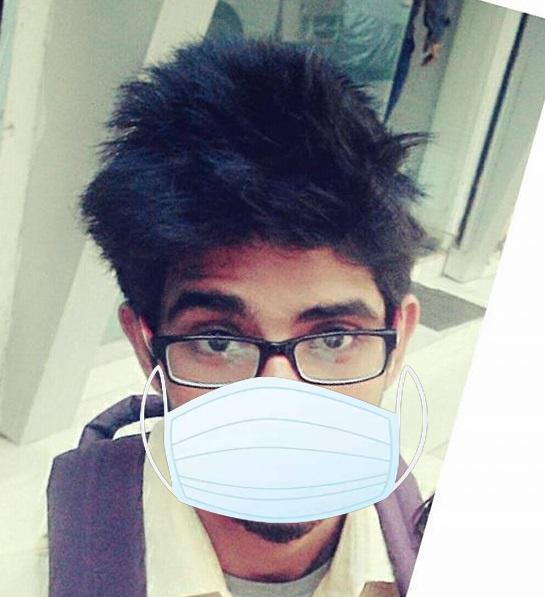

(1, 150, 150, 3)
 with mask
(244, 214, 3)


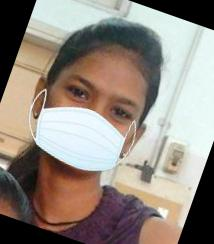

(1, 150, 150, 3)
 with mask
(475, 327, 3)


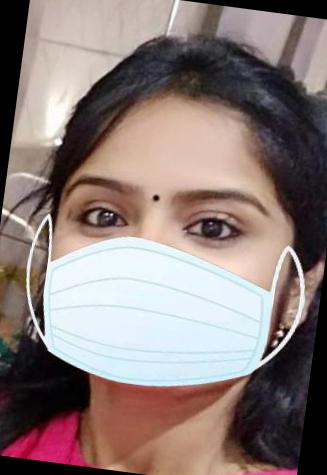

(1, 150, 150, 3)
 with mask
(480, 640, 3)


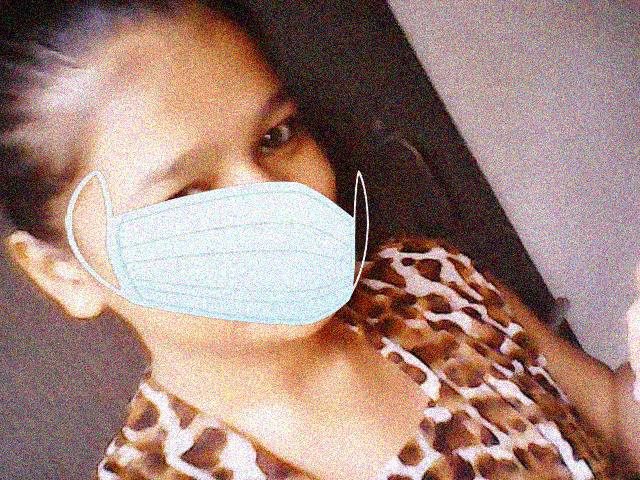

(1, 150, 150, 3)
 with mask
(429, 354, 3)


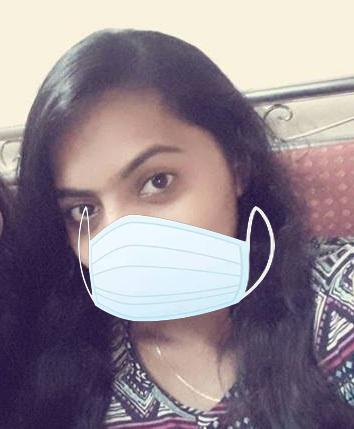

(1, 150, 150, 3)
 with mask
(433, 320, 3)


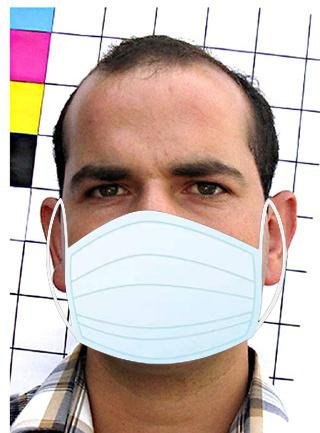

(1, 150, 150, 3)
without mask
(225, 225, 3)


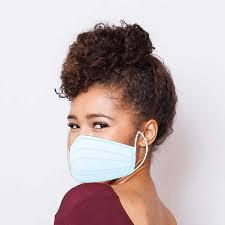

(1, 150, 150, 3)
without mask
(433, 320, 3)


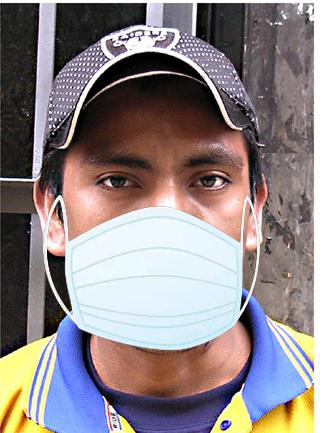

(1, 150, 150, 3)
 with mask
(183, 275, 3)


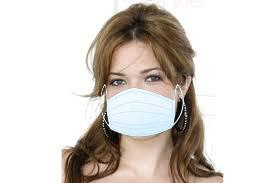

(1, 150, 150, 3)
without mask
(428, 320, 3)


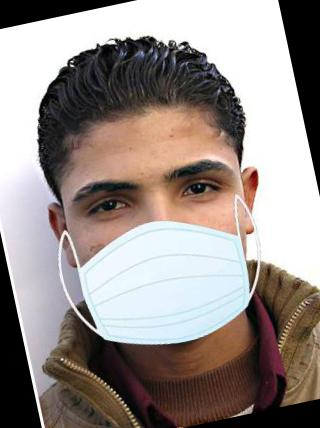

In [ ]:
from google.colab.patches import cv2_imshow
probs = ''
img ='/content/drive/My Drive/Face Mask Detection/dataset/with mask/'
for images in os.listdir(img) :
    face_img= cv2.imread(img+images)
    print(face_img.shape)
    cv2_imshow(face_img)
  #plt.imread(img+images)
  #plt.show
  
    resized=cv2.resize(face_img,(150,150))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,150,150,3))
    print(reshaped.shape)
  #result=model.predict(reshaped)
    result = model.predict(reshaped)
    if result > 0.5 :
      probs = 'without mask'
    else :
      probs = ' with mask'
    print(probs)
    if cv2.waitKey(1) == ord('q') :
      break

# Live video code

In [ ]:
# Code for live video streaming
#replace cv2_imread to cv2.imread when doing outside google colab

face_clsfr=cv2.CascadeClassifier('/content/drive/My Drive/Face_Mask/haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(-1)
probs = ''

while source.isOpened() :
  ret,frame = source.read()
  gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

  faces = face_clsfr.detectMultiScale(gray,1.3,5)
  for a,b,x,y in faces :
    face_img=gray[a:a+x,b:b+y]
    resized=cv2.resize(face_img,(150,150))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,150,150,3))

    result = model.predict(reshaped)
    if result > 0.5 :
      probs = 'without mask'
    else :
      probs = ' with mask'
    cv2.rectangle(frame,(a,b),(a+x,b+y),(255,0,122),2)
    cv2.putText(frame, probs , (a, b-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)


  cv2_imshow(frame)
  if cv2.waitKey(0) & 0xFF == ord('q'):
    break
source.release()
cv2.destroyAllWindows()



# Use this code only if you are loading weights

In [ ]:
def create_model():
  #callbacks = MyCallback()
  model = tf.keras.models.Sequential([
                             tf.keras.layers.Conv2D(200,(3,3),activation=tf.nn.relu,input_shape = (150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             
                             tf.keras.layers.Conv2D(100,(3,3),activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(2,2),
                              
                             tf.keras.layers.Conv2D(50,(3,3),activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(2,2),
                              
                              
                             tf.keras.layers.Conv2D(50,(3,3),activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(2,2),
                              
                             tf.keras.layers.Flatten(), 
                             tf.keras.layers.Dense(50,activation =tf.nn.relu),
                             tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)                
                            

  ])
  model.summary()
  model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])
  return model                            
  

In [ ]:
model = create_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 200)     5600      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 200)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 100)       180100    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 100)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 50)        45050     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 50)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 50)       

In [ ]:
model.load_weights(checkpoint_dir)

In [ ]:
print(result.shape)

(1, 1)


In [ ]:
print(result)

[[0.16158013]]
